In [181]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

![](https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png)

In [182]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
# print(X)
# print(y)
# exit()
feature_names = iris.feature_names
target_names = iris.target_names

classes = np.unique(y)

print(feature_names)
print(target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


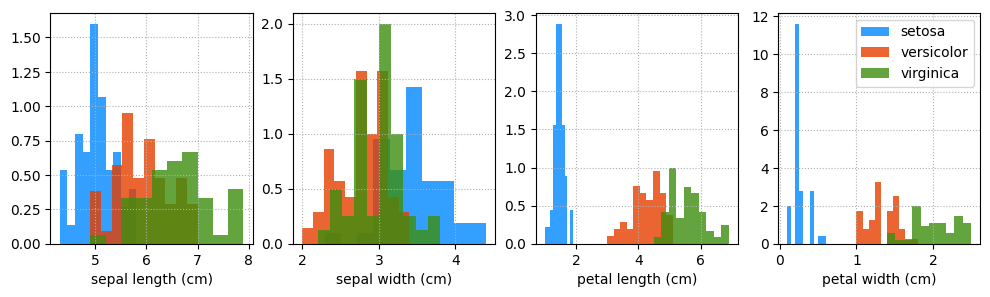

In [183]:
plot_hist(iris)

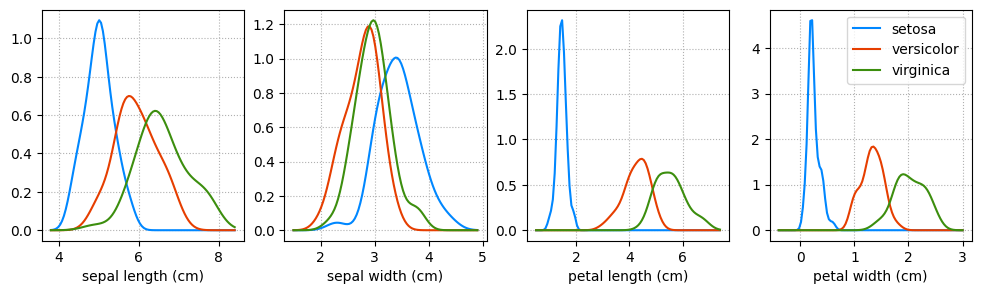

In [184]:
plot_kde(iris)

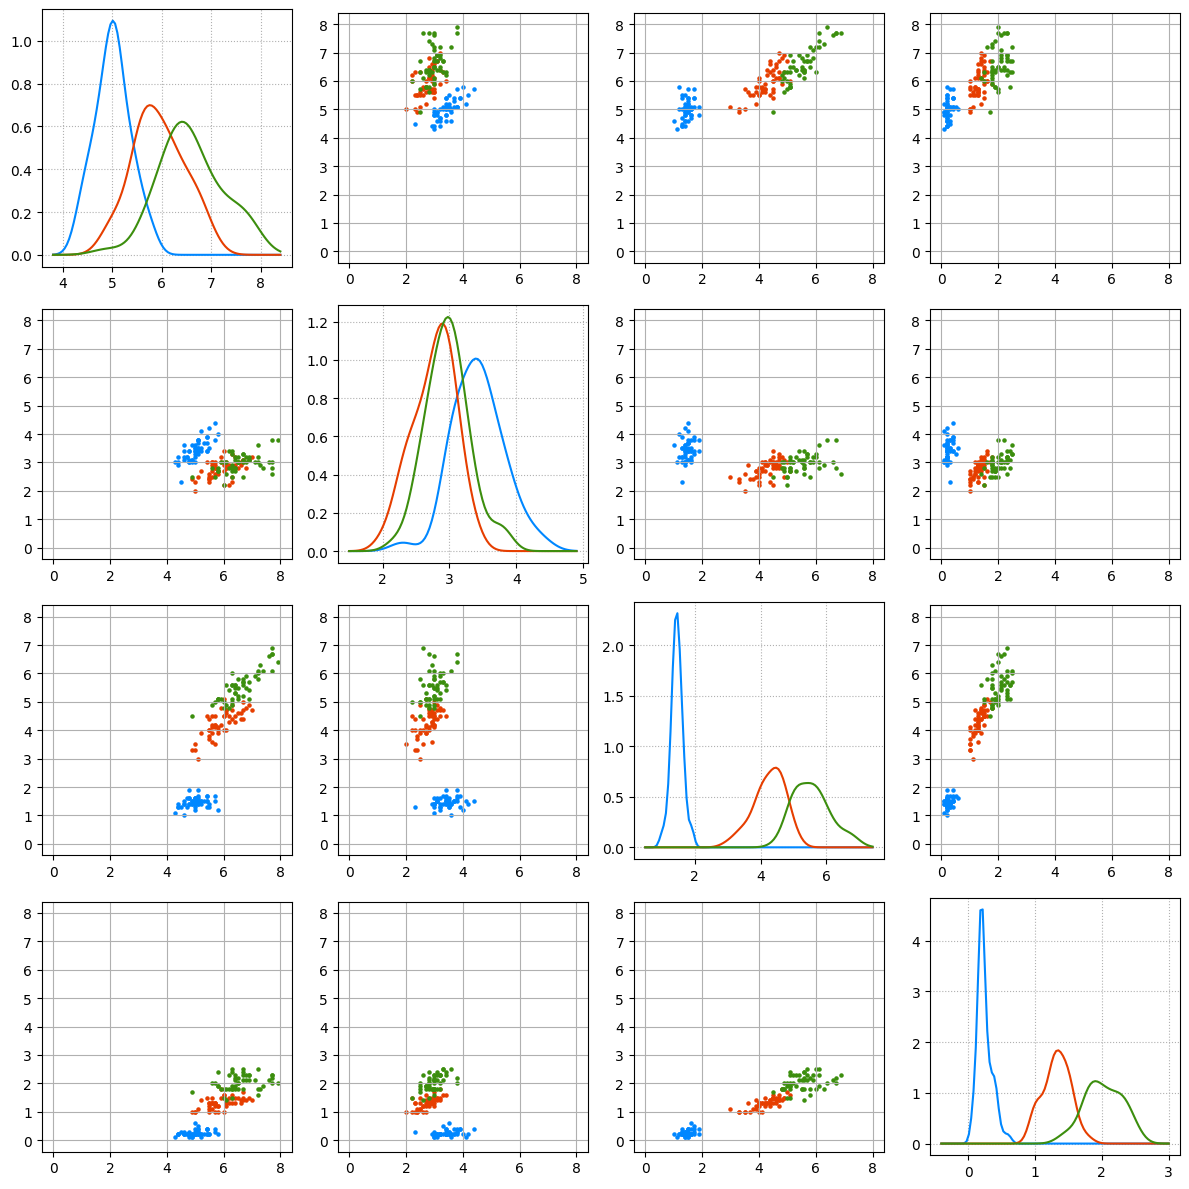

In [185]:
from utils import plot_scatter

plot_scatter(iris)

In [186]:
selected_features = (0, 1)
x = X[:, selected_features]

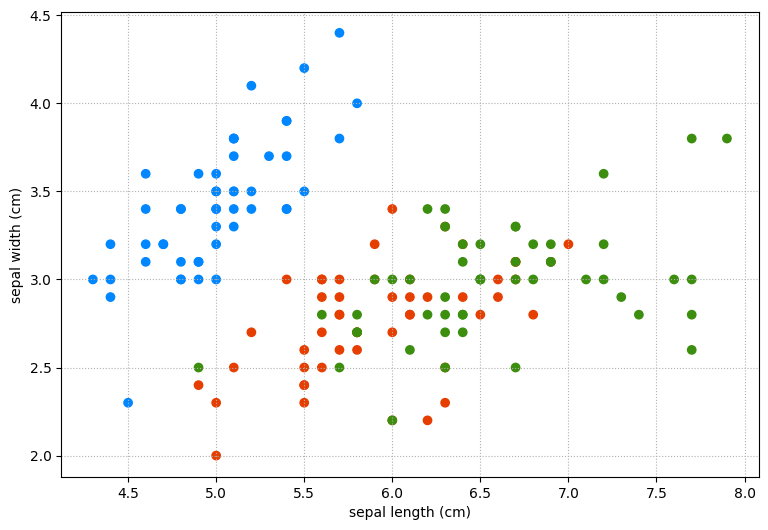

In [187]:
fig, ax = plt.subplots(1, 1, figsize=(1.5 * BW, 1.5 * BW))

ax.scatter(*x.T, c=colors[y])
ax.set_xlabel(feature_names[selected_features[0]])
ax.set_ylabel(feature_names[selected_features[1]])
ax.set_aspect(True)
ax.grid(True, ls=':')

In [188]:
centroids = np.array([
    np.mean(x[y == l], axis=0) for l in classes
])

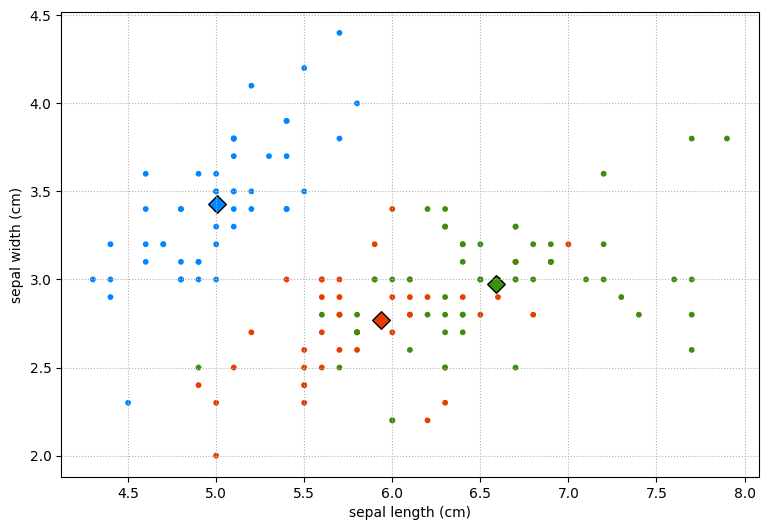

In [189]:
fig, ax = plt.subplots(1, 1, figsize=(1.5 * BW, 1.5 * BW))

ax.scatter(*x.T, c=colors[y], s=10)

for c, center in zip(colors, centroids):
    ax.scatter(*center, marker="D", s=80, facecolor=c, edgecolors='k')

ax.set_xlabel(feature_names[selected_features[0]])
ax.set_ylabel(feature_names[selected_features[1]])
ax.set_aspect('equal')
ax.grid(True, ls=':')

In [190]:
from scipy.spatial.distance import cdist

def nearest_centroid(X, centroids):
    dist_mat = cdist(X, centroids)
    return np.argmin(dist_mat, axis=1)

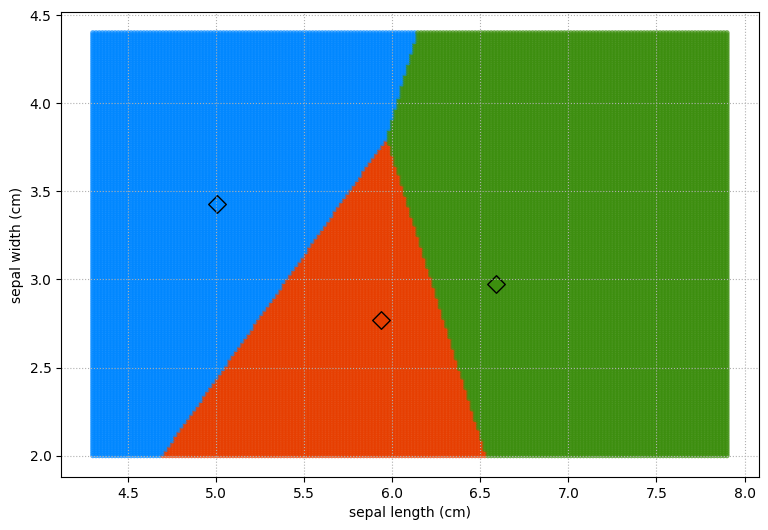

In [191]:
P = 200
xmin, ymin = np.min(x, axis=0)
xmax, ymax = np.max(x, axis=0)

xx, yy = np.meshgrid(
    np.linspace(xmin, xmax, P),
    np.linspace(ymin, ymax, P)
)

space = np.c_[xx.ravel(), yy.ravel()]

label = nearest_centroid(space, centroids)

fig, ax = plt.subplots(1, 1, figsize=(1.5 * BW, 1.5 * BW))

# Plot space
ax.scatter(*space.T, c=colors[label], edgecolors='none', s=15, alpha=0.7)
for c, center in zip(colors, centroids):
    ax.scatter(*center, marker="D", s=80, facecolor=c, edgecolors='k')

# Plot misses
y_pred = nearest_centroid(x, centroids)
x_miss = y_pred != y
# ax.scatter(*x[x_miss].T, edgecolors='k', facecolor=colors[y[x_miss]])

ax.set_xlabel(feature_names[selected_features[0]])
ax.set_ylabel(feature_names[selected_features[1]])
ax.set_aspect('equal')
ax.grid(True, ls=':')

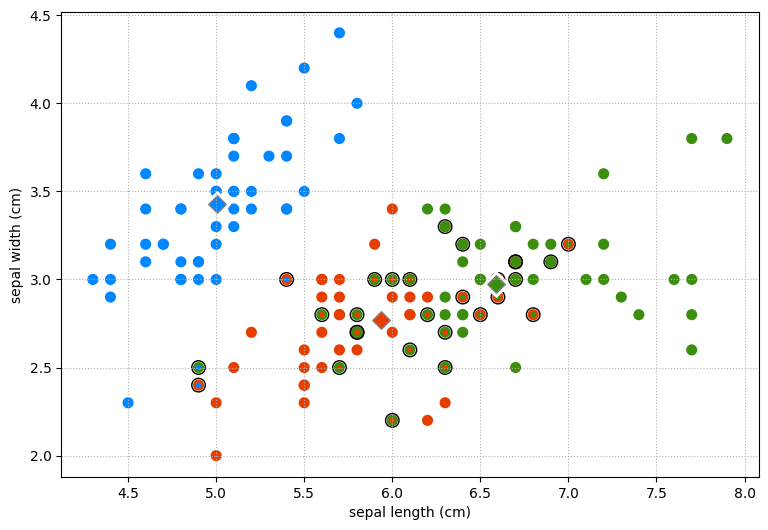

In [192]:
fig, ax = plt.subplots(1, 1, figsize=(1.5 * BW, 1.5 * BW))

x_labels = nearest_centroid(x, centroids)

ax.scatter(*x.T, c=colors[x_labels], edgecolors=colors[y], linewidth=2)
ax.scatter(*x[y != x_labels].T, c='none', edgecolors='k', s=95)

for c, center in zip(colors, centroids):
    ax.scatter(*center, marker="D", s=170, facecolor='w')
    ax.scatter(*center, marker="D", s=80, facecolor=c, edgecolors='gray')

ax.set_xlabel(feature_names[selected_features[0]])
ax.set_ylabel(feature_names[selected_features[1]])
ax.set_aspect('equal')
ax.grid(True, ls=':')

In [193]:
total_samples = len(x)
x_correct = np.sum(y_pred == y)
accuracy = x_correct / total_samples

print("Example Accuracy:", accuracy)


Example Accuracy: 0.8133333333333334


In [194]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score

clf = NearestCentroid()
clf.fit(x, y)
y_pred = clf.predict(x)

accuracy = accuracy_score(y, y_pred)

print("Iris Accuracy:", accuracy)



Iris Accuracy: 0.8133333333333334


## To nie jest prawidłowy sposób weryfikacji klasyfikatora!

In [195]:
from sklearn.decomposition import PCA

x = PCA(n_components=2).fit_transform(X)

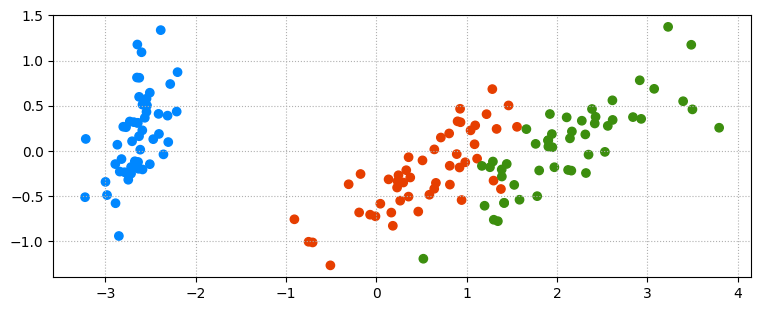

In [196]:
fig, ax = plt.subplots(1, 1, figsize=(1.5 * BW, 1.5 * BW))

ax.scatter(*x.T, c=colors[y])
# ax.set_xlabel(feature_names[selected_features[0]])
# ax.set_ylabel(feature_names[selected_features[1]])
ax.set_aspect(True)
ax.grid(True, ls=':')

In [197]:
clf = NearestCentroid()
clf.fit(x, y)
y_pred = clf.predict(x)

accuracy = accuracy_score(y, y_pred)

print("Iris Accuracy:", accuracy)

Iris Accuracy: 0.9266666666666666


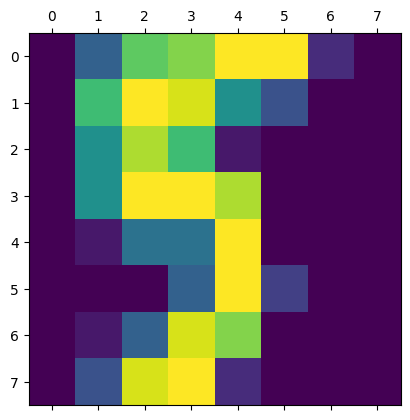

In [198]:
from sklearn.datasets import load_digits

digits = load_digits()
plt.matshow(digits.images[15])

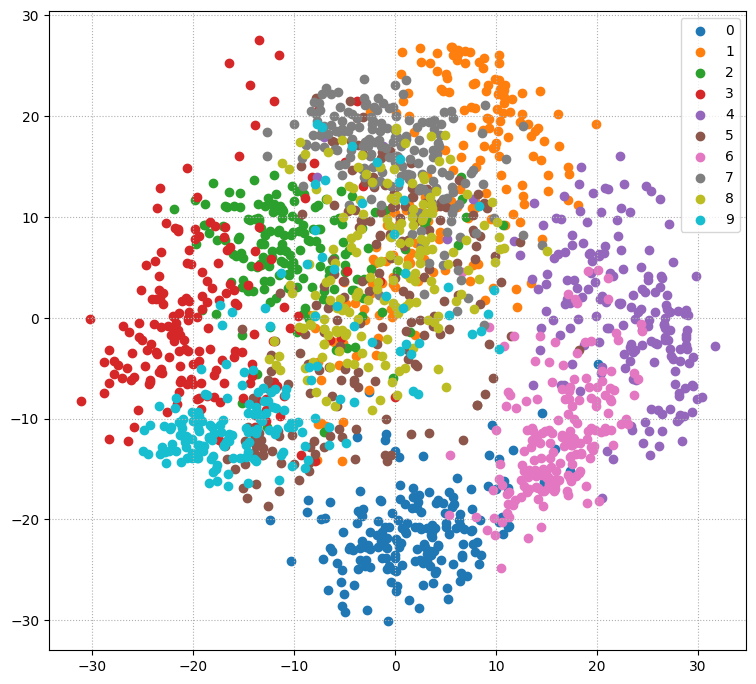

In [199]:
X, y = digits.data, digits.target

x = PCA(n_components=2).fit_transform(X)

fig, ax = plt.subplots(1, 1, figsize=(1.5 * BW, 1.5 * BW))

for i in range(10):
    ax.scatter(*x[y == i].T, label=i)

ax.set_aspect(True)
ax.grid(True, ls=':')
ax.legend()

In [200]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups()

print(*news.target_names, sep='\n')
print()
print(news.data[50])

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc

From: johnc@crsa.bu.edu (John Collins)
Subject: Problem with MIT-SHM
Organization: Boston University
Lines: 27

I am trying to write an image display program that uses
the MIT shared memory extension.  The shared memory segment
gets allocated and attached to the process with no problem.
But the program crashes at the first call to XShmPutImage,
with the following message:

X Error of failed request:  BadShmSeg (invalid shared segment parameter)
  Major opcode of failed request:  133 (MIT-SHM)
  Minor opcode of failed request:  3 (X_ShmPutImage)
  Segment id in failed request 0x0
  Serial number of failed request:  741
  Current serial number in output stream

In [201]:

from sklearn.feature_extraction.text import TfidfVectorizer

X, y = news.data, news.target

vectorizer = TfidfVectorizer(use_idf=False)
vectorizer.fit(X)
x = vectorizer.transform(X)

tokens = vectorizer.get_feature_names_out()
print(len(tokens))
print(tokens[56979])
print(x[0])

130107
from
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 89 stored elements and shape (1, 130107)>
  Coords	Values
  (0, 4605)	0.06401843996644799
  (0, 16574)	0.06401843996644799
  (0, 18299)	0.06401843996644799
  (0, 26073)	0.06401843996644799
  (0, 27436)	0.06401843996644799
  (0, 28615)	0.12803687993289598
  (0, 32311)	0.06401843996644799
  (0, 34181)	0.06401843996644799
  (0, 34995)	0.06401843996644799
  (0, 35187)	0.06401843996644799
  (0, 35612)	0.06401843996644799
  (0, 35983)	0.06401843996644799
  (0, 37433)	0.06401843996644799
  (0, 37565)	0.06401843996644799
  (0, 37780)	0.32009219983223997
  (0, 40998)	0.06401843996644799
  (0, 42876)	0.06401843996644799
  (0, 45295)	0.06401843996644799
  (0, 48618)	0.06401843996644799
  (0, 48620)	0.06401843996644799
  (0, 50111)	0.06401843996644799
  (0, 50527)	0.12803687993289598
  (0, 51730)	0.06401843996644799
  (0, 51793)	0.06401843996644799
  (0, 56979)	0.19205531989934396
  :	:
  (0, 104813)	0.06401843996644799
  (0

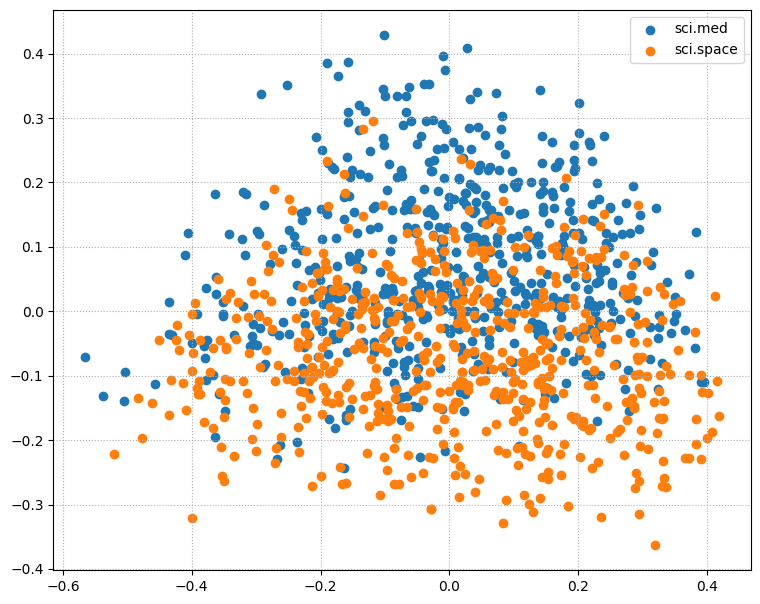

In [202]:
news = fetch_20newsgroups(categories=["sci.med", "sci.space"])

X, y = news.data, news.target

# vectorizer = TfidfVectorizer()
x = vectorizer.transform(X)

x = PCA(n_components=2).fit_transform(x)

fig, ax = plt.subplots(1, 1, figsize=(1.5 * BW, 1.5 * BW))

for l in np.unique(y):
    ax.scatter(*x[y == l].T, label=news.target_names[l])

ax.set_aspect(True)
ax.grid(True, ls=':')
ax.legend()
